In [156]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# How long would it take to fall through the Earth?

## Gravity inside the Earth

What would happen if the ground under you disappeared and you fell all the way to the center of the Earth? What if someone somehow made a tunnel from the surface to the core? How fast would you go along the way? How long would it take to fall all the way through?

To anwser these questions, you will need to understand the effects of gravity inside of the Earth.


### Gravity

The gravitational force between two objects is given by $F = \frac{GMm}{r^2}$

where G is the gravitational constant $6.68\times10^{-11} Nm^2 kg^{-2}$, M is the mass of one of the objects, m is the mass of the other object and r is the distance between the objects. The force acts on both of the objects, and is pointed from one object to the other. Furthermore, Newtons second law gives us that:

$$
\begin{align*}
F = ma \Rightarrow a = \frac{F}{m} = \frac{GMm}{r^2m} = \frac{GM}{r^2}
\end{align*}
$$

This means that the gravitational acceleration at any given time is dependant only on the mass of the object pulling on you, and your distance to it.

**EXCERCISE 1:**

Write the function **gravAccel(totalmass, position)** that takes the mass of the object exerting the gravitational force, and the position relative to it as parameters, and returns the resultant gravitational **acceleration**. Make the function take the direction of the force into account. A positive position corresponds to being above the object, and a negative position corresponds to being below the object. What result does a position of 0 give?

In [157]:
def gravAccel(totalmass, position):
    return - 6.68e-11 * totalmass / position ** 2

### The Shell Theorem

The main difference between being affected by gravity while outside the Earth, and being affected while inside it, is how much of it is below you to "pull you down", and how much is above you to "pull you up". As you venture further down, less of the Earth will be below you to pull you down, and more of it will be above you to pull you up. In addition to this, as you get closer to different parts of the Earth, they will have a greater pull on you due to being closer to you (**this will be important later**).

If we assume the Earth is perfectly spherical, the sum of these effects are described by the [Shell Theorem](http://hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/sphshell2.html), which makes this problem much simpler. The Shell Theorem has the following implications for our problem:

- A spherically symmetric body affects external objects gravitationally as though all of its mass were concentrated at a point at its centre
- When at a distance r from the center, all mass at a greater distance than r can be ignored

This means that we do not have to calculate the gravitational pull from all throughout the Earth, since we can act as if all of the Earth's mass is located in its center. We also only need to worry about the what is further in than the point you are currently at.

<img src="https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/ShellTheorem.jpg" alt="Drawing" style="width: 50%;"/>

## Falling through a uniform Earth

To start with, assume that the Earth has a constant density (a uniform Earth). This will make the problem easier to solve, and will make for a good foundation for later, when you will look at falling through a non-uniform Earth.

### Finding gravitational acceleration inside of a uniform Earth

**EXERCISE 2:**

Use the Earth's total mass and radius to calculate the density of a uniform Earth.

Using this density, write the function **sphereMass(distance)** that takes the distance from the center of the Earth as an argument, and returns the mass of a sphere with that distance as radius, and with the same density as the uniform Earth. *(This sphere will be the equivelant of the red area in the figure above.)* Why was it specified that the function takes distance as an argument, and not position?

In [158]:
earthMass = 5.972 * 10**24 #The Earth's total mass in kg
earthRadius = 6.371 * 10**6 #The Earth's radius in metres

### add your code here
def sphereMass(distance):
    density = earthMass / (4/3 * np.pi * earthRadius ** 3)
    volume = 4/3 * np.pi * distance ** 3
    return density * volume

**EXERCISE 3:**

Using the **gravAccel** function, the **sphereMass** function, and the implications of the Shell Theorem, write the function **uniformGravityAccel(position)** that calculates the gravitational acceleration at any position relative to the center of a uniform Earth.

In [159]:
def uniformGravityAccel(position):
    return gravAccel(sphereMass(position), position)

## Calculating the fall through a uniform Earth

So far you have a function for acceleration given current position inside of a uniform Earth. Forthermore, if you assume that the fall starts off from the Earth's surface with no velocity, you also have the initial conditions of the fall. Using these two things, the acceleration function and the initial conditions, you can calculate the entire fall using a numerical method. Using a numerical method is not needed to calculate the fall through a uniform Earth, but these principles will prove very useful later when calculating a fall through a non-uniform Earth, where the acceleration function is much more complicated.

### Euler-Cromer Method

The Euler-Cromer method (also known as the semi-implicit Euler method) is a numerical procedure for solving ordinary differential equations with known initial values. You can think of it as a simple numerical integration method, similar to the ways you looked at in C9.

We'll be working with differential equations of the form

$$ \dfrac{dx}{dt} = f(t, v)$$

$$ \dfrac{dv}{dt} = g(t, x)$$

where $v$ is velocity, $x$ is position, and $t$ is time, and initial conditions such that

$$x(t_0) = x_0 \text{ and } v(t_0) = v_0 $$

Like most numerical methods, the Euler-Cromer method uses the fact that although velocity and acceleration might be changing constantly, if you look at them over a very tiny time step they are essentially constant. Using this principle, you can calculate a long series of linear motions with constant velocity, acheiving surprisingly accurate results. The velocity and position at each time step are defined as

$$v_{n+1} = v_{n} + g(t_n, x_n) \Delta t,$$
$$x_{n+1} = x_{n} + g(t_n, v_{n+1}) \Delta t$$

where $\Delta t$ is the timestep.

Note that $v_{n+1}$ is used in the equation for $x_{n+1}$, rather than $v_n$; this is the main benefit of using this method rather than the regular Euler method, it makes it much better at conserving the energy in the system. 

### Timesteps


How long the time steps should be and how many time steps you want is often found by trial and error. 5000 time steps of 1 second will work well here, although this resolution will be insufficient for many other calculations. 

In [160]:
n = 5000
dt = 1

To store the results of the calculations you'll need some arrays. Create arrays called `acceleration`, `velocity` and `position` to store the values. You can use the `np.zeros()` function to create arrays filled with `0`s. This is called **initialising** your array. You should make sure that your arrays are the correct size to hold all of your timesteps.

In [161]:
acceleration = np.zeros(n+1)
velocity = np.zeros(n+1)
position = np.zeros(n+1)

The final bit of initialisation we need to do is set the starting point of our unfortunate test subject who will be falling through the Earth. We know that they'll be starting from the Earth's surface, so we can set the first value in the `position` array to be equal to the Earth's radius. 

In [162]:
position[0] = earthRadius #Setting the initial condition of the fall starting at the surface of the Earth

The last step before we run our simulation is to set up the timesteps. Using `np.linspace()`, create an array called `times` that contains the time values we've decided on above. 

In [163]:
times = np.linspace(0, n*dt, n+1)

### The Euler-Cromer loop

**EXERCISE 4:**

Do the Euler-Cromer calculation of a fall through a uniform Earth with the initial conditions from above, and an acceleration given by the **uniformGravityAccel** function. (The current position during the loop will in this case be position[i])

Here is a template for how the Euler-Cromer method can look:

    for i in range(n-1):
        acceleration[i] = function(arguments)
        velocity[i+1] = velocity[i] + acceleration[i] * dt
        position[i+1] = position[i] + velocity[i+1] * dt
    acceleration[n-1] = function(arguments) #This last line simply lets the final acceleration value be filled in for plotting, although it is not used for the calculation

In [164]:
for i in range(n):
    acceleration[i] = uniformGravityAccel(position[i])
    velocity[i+1] = velocity[i] + acceleration[i] * dt
    position[i+1] = position[i] + velocity[i+1] * dt

acceleration[n] = uniformGravityAccel(position[i])
#This last line simply lets the final acceleration value be filled in for plotting,
#although it is not used for the calculation

### Plotting the results

Now we want to plot up the results. 

Create a figure that has three subplots that show the following:

1. Position as a function of time
2. Velocity as a function of time
3. Acceleration as a function of time

Make sure your plots all have suitibly labeled axes with units!

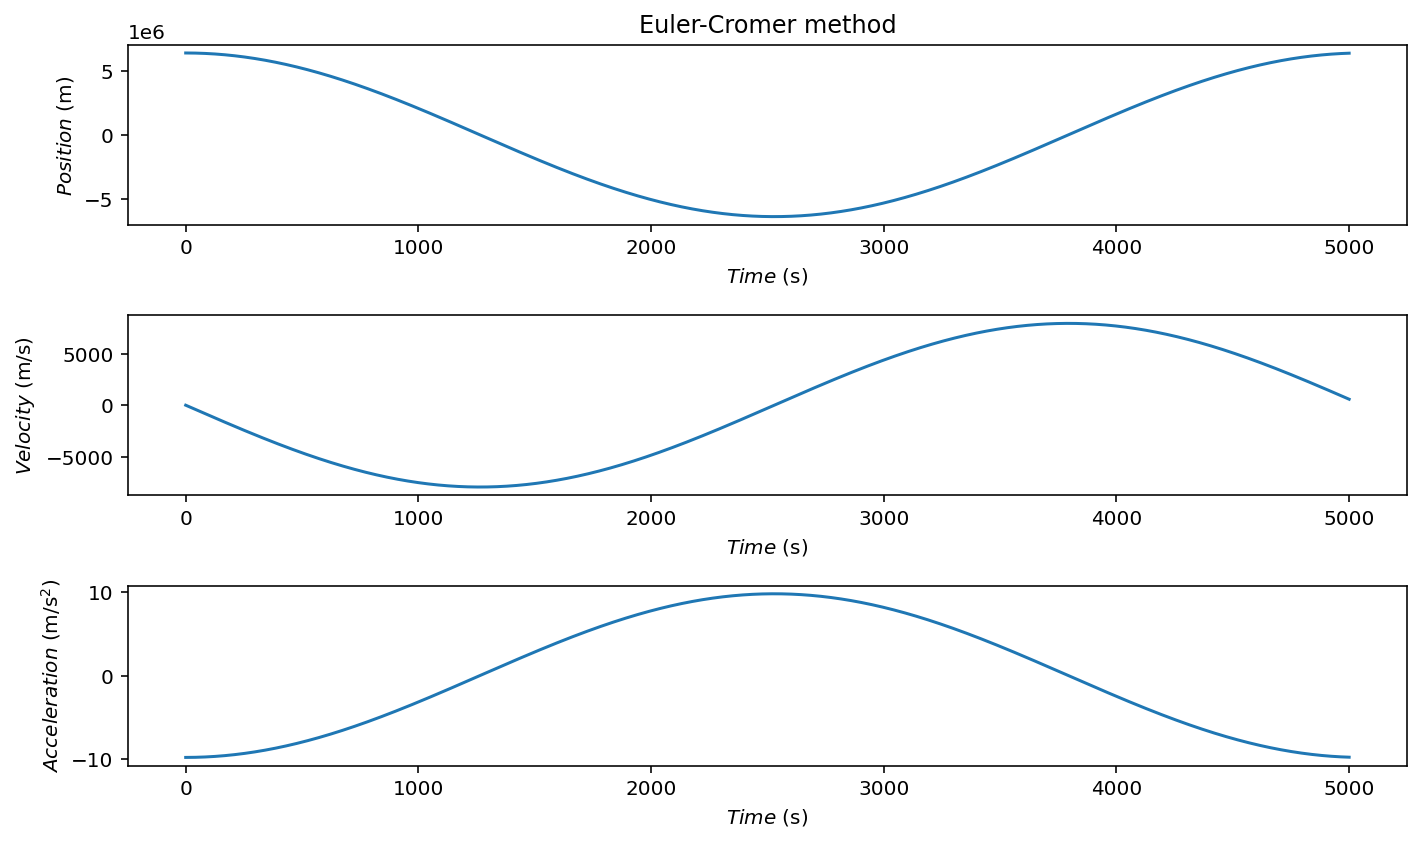

In [165]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax.plot(times, position)
ax1.plot(times, velocity)
ax2.plot(times, acceleration)
ax.set_xlabel('$Time$ (s)')
ax.set_ylabel('$Position$ (m)')
ax1.set_xlabel('$Time$ (s)')
ax1.set_ylabel('$Velocity$ (m/s)')
ax2.set_xlabel('$Time$ (s)')
ax2.set_ylabel('$Acceleration$ (m/s$^2$)')
title_string = 'Euler-Cromer method'
ax.set_title(title_string)
plt.tight_layout()
plt.show()

### Interpreting Results

**EXERCISE 5:**

**a)**
Find the time it takes to fall through the uniform Earth.

In [166]:
print("Time it takes to fall through the uniform Earth (to come back to initial position):", np.argmax(position[1000:])+1000, "s")

Time it takes to fall through the uniform Earth (to come back to initial position): 5000 s


**b)**
Find the maximum velocity along the way.

In [167]:
print(f"Maximum velocity along the way: {max(velocity)} m/s")

Maximum velocity along the way: 7913.0591247341745 m/s


**c)**
Comment on the results. Why do the graphs look the way they do? And specifically:
- Why are the plots for position and acceleration so similar? (look at acceleration as a function of position, and the properties of the derivative of sine waves)

The second derivative of sine is minus sine and the acceleration is the second derivative of position.

## Falling through a non-uniform Earth

So far you have looked at a fall through a uniform Earth, but the Earth is not uniform. The core, mantle and crust have very different densities, which changes the gravity during the fall and thus the nature of the fall significantly. Building a model for gravity inside of the real non-uniform Earth requires reading data, manipulating data and finally fitting data. You will not be required to do this however, as you will only be required to use the new gravity function like you used your previous gravity function. However, you are encouraged to try to understand as much of it as you can, as working with real data is one of the biggest strenghts of doing computational physics.

## Implementing the  variable density of the Earth

This figure shows how the different layers and densities of the Earth fit together.

<img src="https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/RadialDensityPREM.jpg" alt="Drawing" style="width: 40%;"/>

*(taken from <a href="https://en.wikipedia.org/wiki/Structure_of_the_Earth">en.wikipedia.org/wiki/Structure_of_the_Earth</a>)*

### Reading the data

The Preliminary Reference Earth Model is a model which gives us the density of the Earth at different distances from the center.

The data that describes how the density of the earth varies as a function of radius is in the "PREM_ANISOTROPIC.csv" file. Save this file in your `data` directory and read it in with `pandas`. The first column contains the radius values (in metres), the second contains the density values (in kg m$^{-3}$). 


In [168]:
df = pd.read_csv('data/PREM_ANISOTROPIC.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   radius   97 non-null     float64
 1   density  97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Now plot up the density as a function of distance from the centre of the Earth. You should see that it seems to agree with the figure further above.

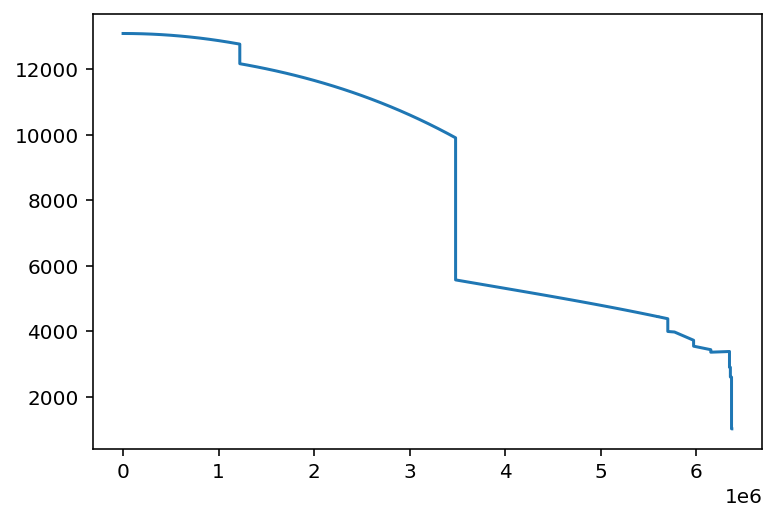

In [169]:
plt.plot(df["radius"], df["density"])
plt.show()

### Manipulating data - Mass at different heights

Like in the uniform case, you need the total mass further in than a given distance to find gravity at a given distance. By working our way from the center we can add one and one "shell" to find the total mass at different distances from the center. The mass and size of each shell is found by first finding the mass of two spheres using the density of the shell we are interested in, and then subtracting the inner sphere from the outer one, leaving us with the mass of the shell.

![title](https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/EarthShells.jpg)

Note that we use the same density for the inner and outer sphere to calculate the mass of the shell. The density we use for the spheres is the average of the Earth's density at the outer and inner radius of the shell. So that:

$$ M_{shell} = M_{outer} - M_{inner} = \frac{4}{3}\pi r_{outer}^3 Density - \frac{4}{3}\pi r_{inner}^3 Density $$

In [170]:
massData = np.zeros(97)

We're now going to do something I spent the whole of last semester telling you not to do. We're going to pull the data out of the dataframe into separate arrays (now you know the rules, you can start to break them)

Create two new arrays called `radiusData` and `densityData`.

Then use the equation above to calculate the mass of each shell, starting at the centre of the Earth and moving outwards. Use the notes in the cell below to get started:

In [171]:
radiusData, densityData = df["radius"], df["density"]

for i in range(1,len(radiusData)):
    shellDensity = (densityData[i] + densityData[i-1])/2 #The average of the density at the outer and inner radius
    #Finding the mass of the shells corresponding to every data point
    shellVolume = 4/3*np.pi*radiusData[i]**3 - 4/3*np.pi*radiusData[i-1]**3
    shellMass = shellVolume * shellDensity
    #Adding the next total mass to the list, adding the mass of the current shell with the previous total mass
    massData[i] = massData[i-1] + shellMass

The datapoints for density have now been turned into datapoints for total mass.

**Optional**: You can uncomment top line of code below if you have implemented the sphereMass() function to see how the two mass models compare

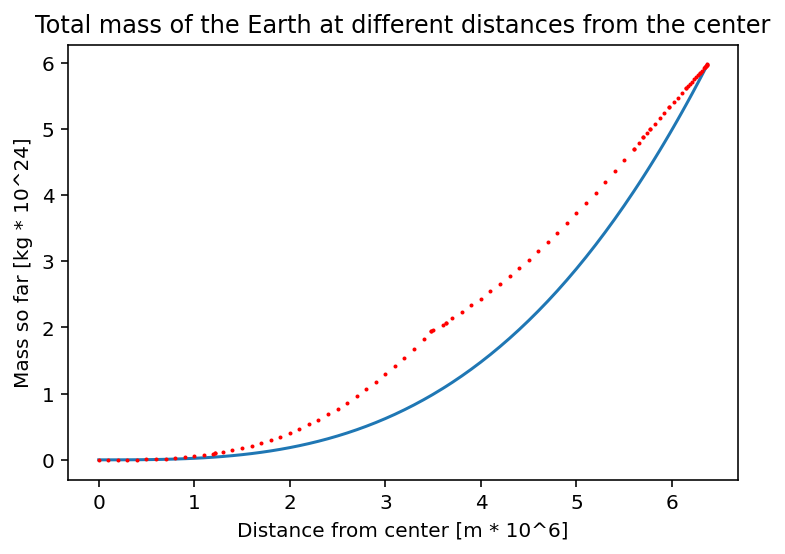

In [172]:
plt.plot(radiusData/(10**6), [sphereMass(r)/(10**24) for r in radiusData], label='spherical model')

plt.plot(radiusData/(10**6), massData/(10**24), "ro", markersize = 1, label='proper model')
plt.title("Total mass of the Earth at different distances from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Mass so far [kg * 10^24]")
plt.show()

### Manipulating data - Acceleration at different heights

The next step is to turn the datapoints into datapoints for the gravitational acceleration.

In [173]:
G = 6.674 * 10**(-11) #The gravitational constant
accelData = np.zeros(97)

for i in range(1,len(radiusData)):
    accelData[i] = G*massData[i]/(radiusData[i]**2) #Using the formula for gravity to find the gravity at each radius in the dataset

### Fitting the data - Creating a general function for acceleration

The next step is to go from datapoints at discrete distances from the center, to a general function that gives the mass between the datapoints. This can be acheived by using the polyfit function. This function finds the polynomial of the given degree that best approximates the datapoints given.

**IMPORTANT** I am generally morally opposed to using `polyfit`, but this is one of the rare cases where it's actually appropriate. I can/will discuss the merits of `curvefit` vs `polyfit` if you would like, but it will likely make you wish you hadn't asked...

In [174]:
import numpy.polynomial.polynomial as poly #Used later for finding a polynomial that approximates the data

turn = np.argmax(accelData) #The spike in the acceleration graph, see the plot below.
deg = 3 #We are using thrid degree polynomials to fit the data
a0, a1, a2, a3 = poly.polyfit(radiusData[:turn], accelData[:turn], deg) #Coefficients for the polynomial fitting the points further in than the "spike"
b0, b1, b2, b3 = poly.polyfit(radiusData[turn:], accelData[turn:], deg) #Coefficients for the polynomial fitting the points further out than the "spike"

earthRadius = list(radiusData)[-1]
earthMass = list(massData)[-1]
def realGravityAccel(pos):
    dist = abs(pos) #The absolute value of the distance
    direc = -np.sign(pos) #The direction of gravity. It is opposite of our the sign of our position

    if dist > earthRadius: #If we are outside the Earth
        return(direc*G*earthMass/pos**2) #Normal formula for acceleration using the mass of the entire Earth

    elif dist < radiusData[turn]: #If we are further in than the "spike"
        return(direc * (a0 + a1*dist + a2*dist**2 + a3*dist**3))
    
    else: #Function 2 for distances further out than the "spike"
        return(direc * (b0 + b1*dist + b2*dist**2 + b3*dist**3))

You now have two polynomials that fit the data points for acceleration, the first one looks like this:

$$
\begin{align*}
f_1(r) &= a_0 + a_1r^1 + a_2r^2 + a_3r^3 \\
f_1(r) &= -2.93 \times 10^{-2} + 3.88 \times 10^{-6}r - 2.40 \times 10^{-13}r^2 + 3.85 \times 10^{-21}r^3
\end{align*}
$$

These polynomials approximate the actual data very well, to illustrate this, they can be plotted together with the data:

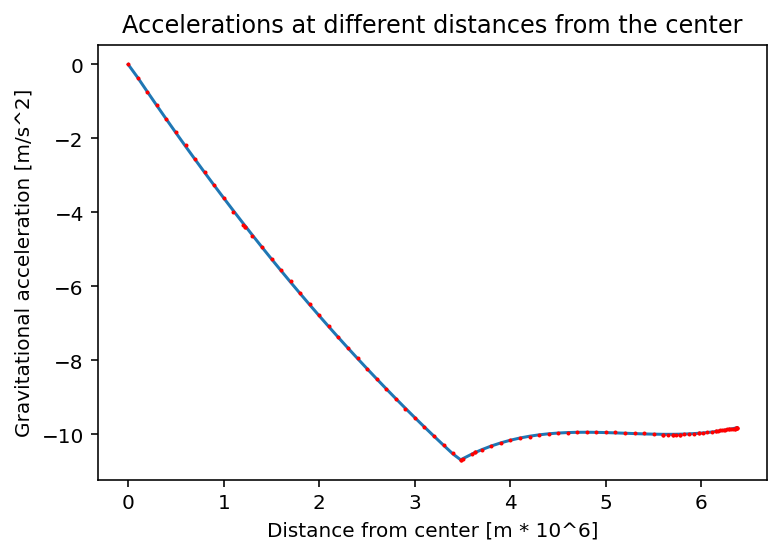

In [175]:
plt.plot(radiusData/(10**6), [realGravityAccel(r) for r in radiusData])
plt.plot(radiusData/(10**6), -accelData, "ro", markersize=1)

plt.title("Accelerations at different distances from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

The red dots are the 97 discrete gravitational acceleration found using the datapoints from the PREM model. The blue line consists of two third degree polynomials that approximate these disctete points. The function **realGravityAccel** made the blue line, and is the function you will use later, instead of the **uniGravityAccel** function.

**EXERCISE 6:**

As you start falling, from the right of the graph, the acceleration will first stay nearly constant before increasing slightly until about 3500km from the center. Why is this? Where in the Earth's structure is gravity the strongest?

Inner mass and radius decreasing at the same time. Strongest midway.

## Calculating the fall through a non-uniform Earth

To calculate the movement through a non-uniform Earth, you will again need to define some paramaters and some lists or arrays to save your results in. Then you will need to use the Euler-Cromer method to calculate the movement step by step.

But before that, you need to take into account the variable density of the Earth.

### Initializing variables and arrays

**EXERCISE 7:**

Be careful to not give your arrays and variables the same names as previous ones.

**a)**
Define the lists or arrays that will hold the positions, velocities and accelerations at any given time during the fall. You can start with a time step of 1 second, and 5000 iterations in your loop, but play around with these values to see how they change things. 

**b)**
Make the starting distance from the center equal to the radius of the Earth, and make the starting velocity 0 m/s.

**c)**
Define a list or array that holds all of the different times, for plotting.

In [176]:
N = 5000
dt = 1
position, velocity, acceleration = np.zeros(N+1), np.zeros(N+1), np.zeros(N+1)
position[0] = earthRadius
velocity[0] = 0
times = np.linspace(0, N*dt, N+1)

### The Euler-Cromer loop

**EXERCISE 8:**

Do the Euler-Cromer calculation of a fall through a uniform Earth with the initial conditions from exercise 7, and an acceleration given by the **realGravityAccel** function.

In [177]:
for i in range(N):
    acceleration[i] = realGravityAccel(position[i])
    velocity[i+1] = velocity[i] + acceleration[i] * dt
    position[i+1] = position[i] + velocity[i+1] * dt

acceleration[N] = realGravityAccel(position[i])

### Plotting the results

**EXERCISE 9:**

Plot your results from exercise 8 (position, velocity and acceleration as a function of time).

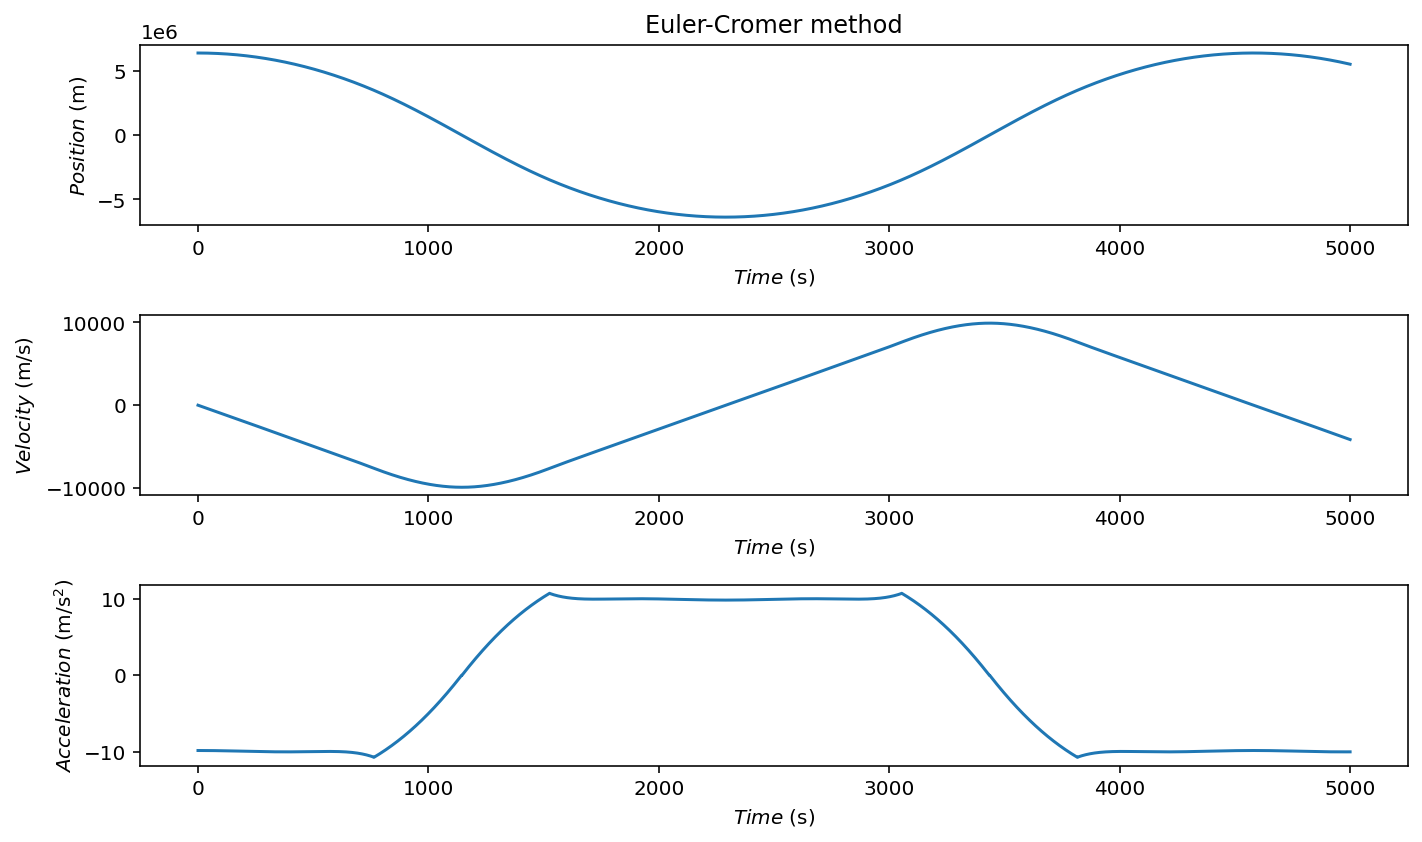

In [178]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(3,1,1)
ax1 = fig.add_subplot(3,1,2)
ax2 = fig.add_subplot(3,1,3)

ax.plot(times, position)
ax1.plot(times, velocity)
ax2.plot(times, acceleration)
ax.set_xlabel('$Time$ (s)')
ax.set_ylabel('$Position$ (m)')
ax1.set_xlabel('$Time$ (s)')
ax1.set_ylabel('$Velocity$ (m/s)')
ax2.set_xlabel('$Time$ (s)')
ax2.set_ylabel('$Acceleration$ (m/s$^2$)')
title_string = 'Euler-Cromer method'
ax.set_title(title_string)
plt.tight_layout()
plt.show()

### Analyzing the results

**EXERCISE 10:**

**a)**

Explain why these graphs look so different to the ones in the uniform case:
  - How and why are the acceleration graphs different?
  - How and why are the velocity graphs different?
  - How and why are the position graphs different?

Acceleration is different because density and hence mass of the shells is different, to understand shape of curve see variation in density.
Velocity and position are dependent on acceleration.

**b)**

Find the time it takes to fall through the non-uniform Earth.

Why would it take less/more time to fall through the non-uniform Earth when the Earth's total mass is the same in both cases?

In [179]:
print("Time it takes to fall through the uniform Earth (to come back to initial position):", np.argmax(position[1000:])+1000, "s")

Time it takes to fall through the uniform Earth (to come back to initial position): 4580 s


**c)**
Find the maximum velocity along the way. When is this velocity reached?

Why was it higher/lower when the Earth's total mass is the same in both cases?

In [180]:
print(f"Maximum velocity along the way: {max(velocity)} m/s")

Maximum velocity along the way: 9920.440019180362 m/s


Some **optional** brain teasers:

 - If you started in the center, how fast would you need to go to reach the surface? Conservation of energy (conservative force).
 - What would eventually happen if you included air resistance in your model? Acceleration different. Air resistance would cause you to fall at terminal velocity.
 - Could the Earth's rotation affect the fall in any way? Yes, inertial acceleration.
 - Why is it extremely difficult to dig a tunnel through the Earth? Because of air resistance, one would end up stuck at the center of the Earth, completely weightless.